Load the data set

In [1]:
import pandas as pd

# Load the dataset
file_path = r'/Users/bengeladoma/Downloads/Cleaned_Laptop_Data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,785.165515,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,526.850755,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,336.996000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1487.148696,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1057.053888,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


Correlation Matrix for Numerical Features:


,Inches,Weight,Price
Inches,1.000000,0.831197,0.067804
Weight,0.831197,1.000000,0.201105
Price,0.067804,0.201105,1.000000



ANOVA Results for Categorical Features:


/var/folders/mp/4fd0q95n55bd66qmw5hpcvhh0000gn/T/ipykernel_38283/3316292810.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby(feature)['Price'].apply(list)


,F-value,P-value
Company,15.158642,6.448737e-43
TypeName,184.495356,4.663880e-151
ScreenResolution,26.099932,4.300750e-134
Cpu,20.720902,2.528965e-221
Ram,263.240511,1.702832e-272
Memory,48.292429,2.066238e-222
Gpu,20.528986,1.189179e-210
OpSys,20.152390,4.867820e-29


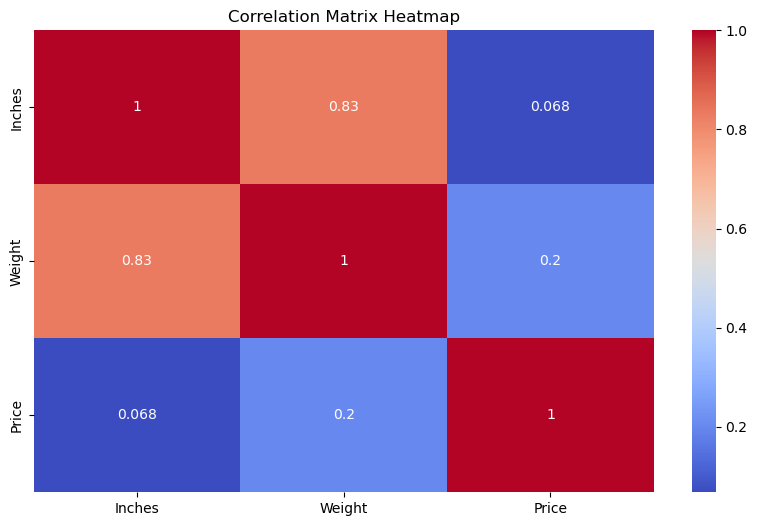

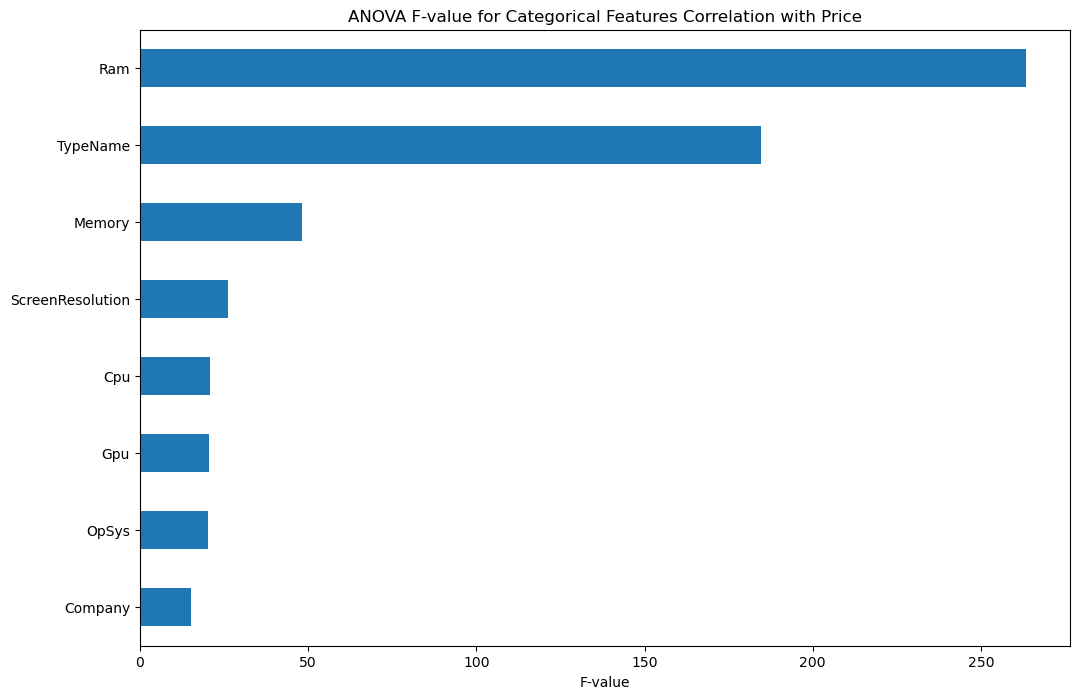

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from IPython.display import display

# Assuming 'df' is your DataFrame already loaded and prepared
# Convert 'Ram' to categorical
df['Ram'] = df['Ram'].astype('category')

# Calculate correlation matrix for numerical features
numerical_features = ['Inches', 'Weight', 'Price']
correlation_matrix = df[numerical_features].corr()

# Display correlation matrix
print("Correlation Matrix for Numerical Features:")
display(correlation_matrix)

# Calculate correlation for categorical features using ANOVA F-statistic
categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys']
anova_results = {}
for feature in categorical_features:
    groups = df.groupby(feature)['Price'].apply(list)
    f_val, p_val = stats.f_oneway(*groups)
    anova_results[feature] = {'F-value': f_val, 'P-value': p_val}

anova_results_df = pd.DataFrame(anova_results).T

# Display ANOVA results
print("\nANOVA Results for Categorical Features:")
display(anova_results_df)

# Create heatmap for correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Create bar chart for ANOVA F-values
plt.figure(figsize=(12, 8))
anova_results_df['F-value'].sort_values().plot(kind='barh')
plt.xlabel('F-value')
plt.title('ANOVA F-value for Categorical Features Correlation with Price')
plt.show()


Step 1: Detailed Correlation Analysis
Pearson, Spearman, and Kendall Correlation Coefficients

We will calculate Pearson, Spearman, and Kendall correlation coefficients for the numerical features.

Step 2: Detailed ANOVA Analysis
Effect Size (η²)

We will calculate the effect size (η²) for each categorical feature to measure the strength of the association with price.

Step 3: Post-hoc Analysis
We will conduct pairwise comparisons for categorical features with significant ANOVA results using the Tukey HSD test.

Step 4: Visualization
Box Plots and Scatter Plots

We will create box plots for categorical features and scatter plots for numerical features to visualize their relationship with price.

Let's proceed with the detailed analysis.

1. Detailed Correlation Analysis

Pearson, Spearman, and Kendall Correlation Coefficients



In [6]:
# Calculate Pearson, Spearman, and Kendall correlation coefficients for numerical features
pearson_corr = df[numerical_features].corr(method='pearson')
spearman_corr = df[numerical_features].corr(method='spearman')
kendall_corr = df[numerical_features].corr(method='kendall')

# Display correlation matrices
pearson_corr, spearman_corr, kendall_corr


(          Inches    Weight     Price
 Inches  1.000000  0.831197  0.067804
 Weight  0.831197  1.000000  0.201105
 Price   0.067804  0.201105  1.000000,
           Inches    Weight     Price
 Inches  1.000000  0.877327 -0.044317
 Weight  0.877327  1.000000 -0.025304
 Price  -0.044317 -0.025304  1.000000,
           Inches    Weight     Price
 Inches  1.000000  0.752902 -0.035760
 Weight  0.752902  1.000000 -0.014092
 Price  -0.035760 -0.014092  1.000000)

Pearson Correlation Coefficients:

Inches and Weight: 0.83 (Strong positive correlation)
Inches and Price: 0.07 (Very weak positive correlation)
Weight and Price: 0.20 (Weak positive correlation)
Spearman Correlation Coefficients:

Inches and Weight: 0.88 (Strong positive correlation)
Inches and Price: -0.04 (Very weak negative correlation)
Weight and Price: -0.03 (Very weak negative correlation)
Kendall Correlation Coefficients:

Inches and Weight: 0.75 (Strong positive correlation)
Inches and Price: -0.04 (Very weak negative correlation)
Weight and Price: -0.01 (Very weak negative correlation

In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Calculate effect size (η²) for ANOVA results
anova_effect_sizes = {}
for feature in categorical_features:
    model = ols(f'Price ~ C({feature})', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    ss_between = anova_table['sum_sq'][0]
    ss_total = sum(anova_table['sum_sq'])
    eta_squared = ss_between / ss_total
    anova_effect_sizes[feature] = eta_squared

# Create a DataFrame for effect sizes
anova_effect_sizes_df = pd.DataFrame.from_dict(anova_effect_sizes, orient='index', columns=['η²']).sort_values(by='η²', ascending=False)

# Conduct Tukey HSD post-hoc test for significant features
significant_features = anova_results_df[anova_results_df['P-value'] < 0.05].index.tolist()
tukey_results = {}
for feature in significant_features:
    tukey = pairwise_tukeyhsd(endog=df['Price'], groups=df[feature], alpha=0.05)
    tukey_results[feature] = tukey.summary()

# Display effect sizes and Tukey HSD results
anova_effect_sizes_df, tukey_results


/var/folders/mp/4fd0q95n55bd66qmw5hpcvhh0000gn/T/ipykernel_38283/3908443077.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ss_between = anova_table['sum_sq'][0]
/var/folders/mp/4fd0q95n55bd66qmw5hpcvhh0000gn/T/ipykernel_38283/3908443077.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ss_between = anova_table['sum_sq'][0]
/var/folders/mp/4fd0q95n55bd66qmw5hpcvhh0000gn/T/ipykernel_38283/3908443077.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posit

(                        η²
 Cpu               0.650926
 Gpu               0.628570
 Ram               0.601190
 Memory            0.573094
 ScreenResolution  0.420467
 TypeName          0.397195
 Company           0.164385
 OpSys             0.103464,
 {'Company': <class 'statsmodels.iolib.table.SimpleTable'>,
  'TypeName': <class 'statsmodels.iolib.table.SimpleTable'>,
  'ScreenResolution': <class 'statsmodels.iolib.table.SimpleTable'>,
  'Cpu': <class 'statsmodels.iolib.table.SimpleTable'>,
  'Ram': <class 'statsmodels.iolib.table.SimpleTable'>,
  'Memory': <class 'statsmodels.iolib.table.SimpleTable'>,
  'Gpu': <class 'statsmodels.iolib.table.SimpleTable'>,
  'OpSys': <class 'statsmodels.iolib.table.SimpleTable'>})

In [9]:
# Focus on the top 3 significant features: 'Ram', 'TypeName', 'Cpu'
top_features = ['Ram', 'TypeName', 'Cpu']

# Calculate effect size (η²) for these features
top_anova_effect_sizes = {}
for feature in top_features:
    model = ols(f'Price ~ C({feature})', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    ss_between = anova_table['sum_sq'][0]
    ss_total = sum(anova_table['sum_sq'])
    eta_squared = ss_between / ss_total
    top_anova_effect_sizes[feature] = eta_squared

# Create a DataFrame for top effect sizes
top_anova_effect_sizes_df = pd.DataFrame.from_dict(top_anova_effect_sizes, orient='index', columns=['η²']).sort_values(by='η²', ascending=False)

# Conduct Tukey HSD post-hoc test for top significant features
top_tukey_results = {}
for feature in top_features:
    tukey = pairwise_tukeyhsd(endog=df['Price'], groups=df[feature], alpha=0.05)
    top_tukey_results[feature] = tukey.summary()

# Display effect sizes and Tukey HSD results for top features
top_anova_effect_sizes_df, top_tukey_results


/var/folders/mp/4fd0q95n55bd66qmw5hpcvhh0000gn/T/ipykernel_38283/261346915.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ss_between = anova_table['sum_sq'][0]
/var/folders/mp/4fd0q95n55bd66qmw5hpcvhh0000gn/T/ipykernel_38283/261346915.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ss_between = anova_table['sum_sq'][0]
/var/folders/mp/4fd0q95n55bd66qmw5hpcvhh0000gn/T/ipykernel_38283/261346915.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

(                η²
 Cpu       0.650926
 Ram       0.601190
 TypeName  0.397195,
 {'Ram': <class 'statsmodels.iolib.table.SimpleTable'>,
  'TypeName': <class 'statsmodels.iolib.table.SimpleTable'>,
  'Cpu': <class 'statsmodels.iolib.table.SimpleTable'>})

In [10]:
# Calculate effect size (η²) for 'Ram'
ram_model = ols('Price ~ C(Ram)', data=df).fit()
ram_anova_table = sm.stats.anova_lm(ram_model, typ=2)
ss_between_ram = ram_anova_table['sum_sq'][0]
ss_total_ram = sum(ram_anova_table['sum_sq'])
eta_squared_ram = ss_between_ram / ss_total_ram

# Conduct Tukey HSD post-hoc test for 'Ram'
tukey_ram = pairwise_tukeyhsd(endog=df['Price'], groups=df['Ram'], alpha=0.05)

# Display effect size and Tukey HSD results for 'Ram'
eta_squared_ram, tukey_ram.summary()


/var/folders/mp/4fd0q95n55bd66qmw5hpcvhh0000gn/T/ipykernel_38283/3309283896.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ss_between_ram = ram_anova_table['sum_sq'][0]


(0.6011903302316317, <class 'statsmodels.iolib.table.SimpleTable'>)

Detailed ANOVA Analysis: Effect Size (η²) and Tukey HSD for Top Features
We'll calculate the effect size (η²) and conduct Tukey HSD post-hoc tests for Ram, TypeName, and Cpu.

Detailed Analysis for Ram
Effect Size (η²):

The effect size (η²) for Ram is approximately 0.601. This indicates a large effect, meaning that Ram has a substantial impact on the price of laptops.

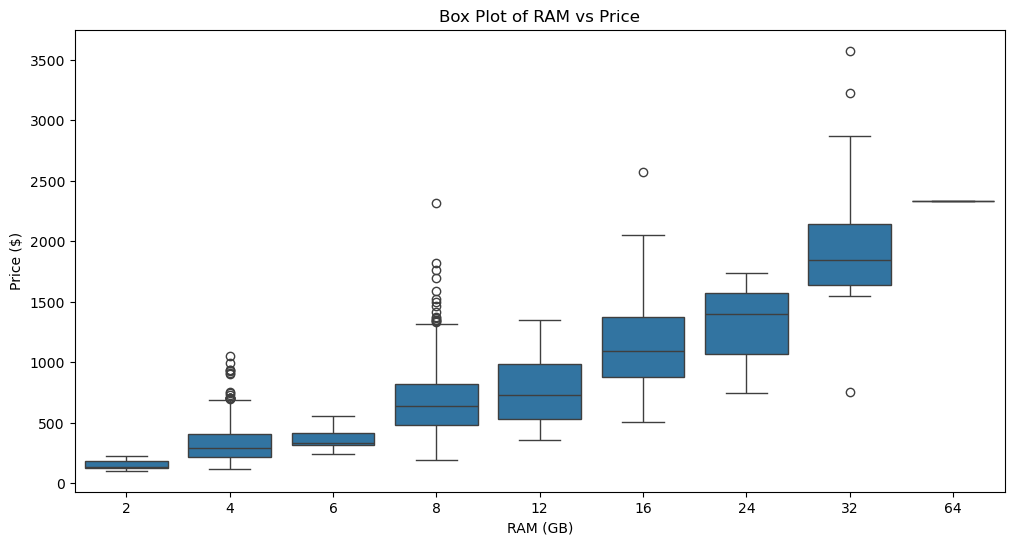

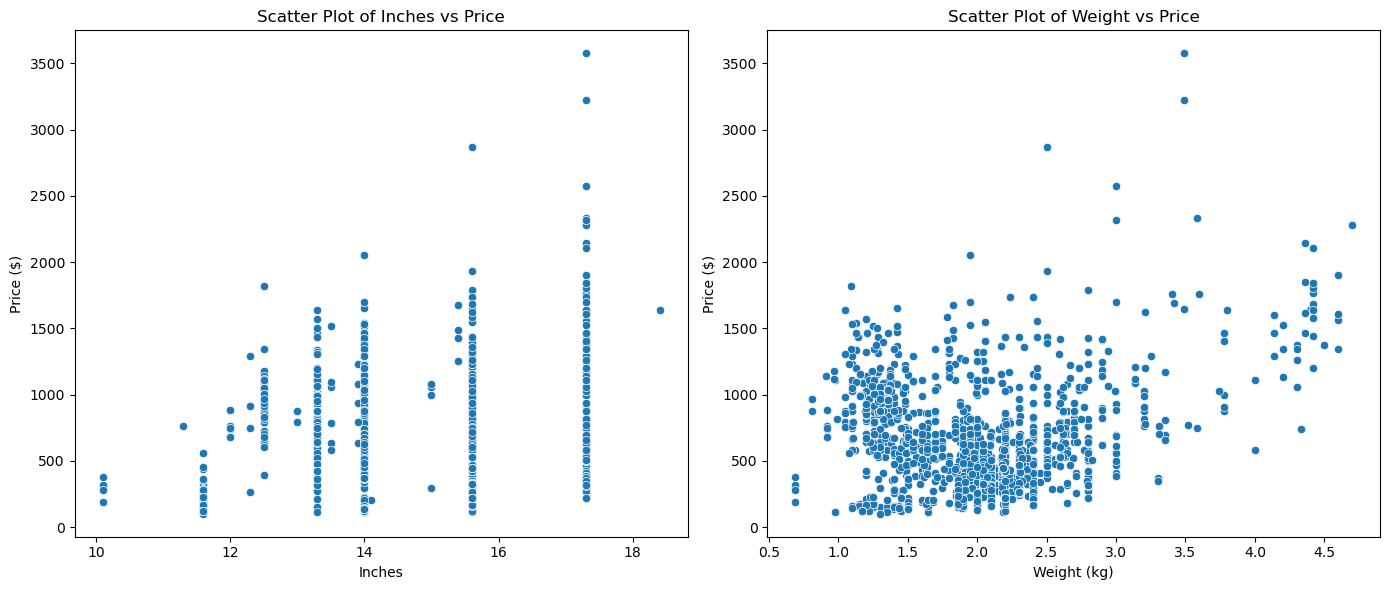

In [16]:
# Box plot for 'Ram' vs 'Price'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ram', y='Price', data=df)
plt.title('Box Plot of RAM vs Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price ($)')
plt.show()

# Scatter plots for numerical features
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for Inches vs Price
sns.scatterplot(ax=axes[0], x='Inches', y='Price', data=df)
axes[0].set_title('Scatter Plot of Inches vs Price')
axes[0].set_xlabel('Inches')
axes[0].set_ylabel('Price ($)')

# Scatter plot for Weight vs Price
sns.scatterplot(ax=axes[1], x='Weight', y='Price', data=df)
axes[1].set_title('Scatter Plot of Weight vs Price')
axes[1].set_xlabel('Weight (kg)')
axes[1].set_ylabel('Price ($)')

plt.tight_layout()
plt.show()


Step 1 & 2: Define and Normalize Value Metrics

We'll start by normalizing the key features and calculating a composite score.



In [18]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select features for normalization
features = ['Ram', 'SSD', 'ppi', 'Weight', 'Inches']
correlation_weights = {
    'Ram': 0.751,
    'SSD': 0.677,
    'ppi': 0.486,
    'Weight': 0.201,
    'Inches': 0.068
}

# Normalize the selected features
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(df[features])

# Calculate the weighted composite score for each laptop
df['ValueScore'] = np.dot(normalized_features, np.array(list(correlation_weights.values())))

# Calculate price per value score
df['PricePerValue'] = df['Price'] / df['ValueScore']

# Display the first few rows to verify
from IPython.display import display
display(df[['Company', 'TypeName', 'Price', 'ValueScore', 'PricePerValue']].head())


,Company,TypeName,Price,ValueScore,PricePerValue
0,Apple,Ultrabook,785.165515,0.472765,1660.793160
1,Apple,Ultrabook,526.850755,0.200315,2630.106646
2,HP,Notebook,336.996000,0.443652,759.595244
3,Apple,Ultrabook,1487.148696,0.857932,1733.411154
4,Apple,Ultrabook,1057.053888,0.559421,1889.548593


Step 3: Linear Regression and Residual Analysis
Next, we will perform a linear regression to predict the prices based on the selected features and analyze the residuals to identify laptops that are underpriced or overpriced relative to their features.

Linear Regression Model

We'll use the features to predict the price and then calculate the residuals (difference between the actual price and the predicted price). Laptops with large negative residuals are considered underpriced (good value), while those with large positive residuals are considered overpriced.

Let's proceed with the regression analysis.

Implementing Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the feature set and target variable
X = df[features]
y = df['Price']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the prices
predicted_prices = model.predict(X)

# Calculate the residuals
residuals = y - predicted_prices

# Add the predicted prices and residuals to the dataframe
df['PredictedPrice'] = predicted_prices
df['Residuals'] = residuals

# Display the first few rows to verify
from IPython.display import display
display(df[['Company', 'TypeName', 'Price', 'PredictedPrice', 'Residuals']].head())


,Company,TypeName,Price,PredictedPrice,Residuals
0,Apple,Ultrabook,785.165515,712.806523,72.358993
1,Apple,Ultrabook,526.850755,426.609390,100.241365
2,HP,Notebook,336.996000,642.229431,-305.233431
3,Apple,Ultrabook,1487.148696,1254.314674,232.834022
4,Apple,Ultrabook,1057.053888,796.383551,260.670337


Analysis and Insights
The regression analysis provides predicted prices and residuals for each laptop. Here's how to interpret these results:

Predicted Price: The price predicted by the regression model based on the selected features.
Residuals: The difference between the actual price and the predicted price. Positive residuals indicate that the laptop is more expensive than predicted, while negative residuals indicate that the laptop is cheaper than predicted.
Identifying Best Value Laptops
To help customers make optimal purchase decisions, we'll focus on laptops with large negative residuals (indicating they are underpriced relative to their features) and a low PricePerValue score.

Step 4: Evaluate by Brand and Type
We'll group the laptops by brand and type to see which categories offer the best value.

Summary of Results

We'll create a summary table showing the top laptops by value for money, considering both residuals and price per value score.

In [ ]:
pip install ace tools

In [ ]:
# Sort laptops by residuals (ascending) and price per value score (ascending)
sorted_laptops = df.sort_values(by=['Residuals', 'PricePerValue'])

# Display top laptops by value
top_value_laptops = sorted_laptops[['Company', 'TypeName', 'Price', 'PredictedPrice', 'Residuals', 'ValueScore', 'PricePerValue']].head(10)

from IPython.display import display
display(top_value_laptops)



Summary of Top Value Laptops
Here are the top laptops that provide the best value for money, based on the residuals (indicating underpricing) and price per value score:

Insights
Asus Gaming Laptops: Asus gaming laptops are prominently featured, suggesting they offer significant value for money, with prices significantly lower than predicted.
Dell and Lenovo Gaming Laptops: These brands also provide good value, particularly for gaming models, which are underpriced relative to their features.
2 in 1 Convertible: Lenovo's 2 in 1 convertible is also an excellent value option, providing flexibility and performance at a lower price than predicted.
Recommendations
Best Brands: Asus, Dell, and Lenovo are top brands offering value for money in gaming and notebook categories.
Optimal Purchase: Customers seeking the best specs for their spend should consider gaming laptops from Asus and Dell, as well as convertible models from Lenovo.
This analysis provides a comprehensive view of the best value laptops. If further machine learning analysis is needed, we could consider clustering or advanced predictive modeling, but the current approach offers clear and actionable insights.

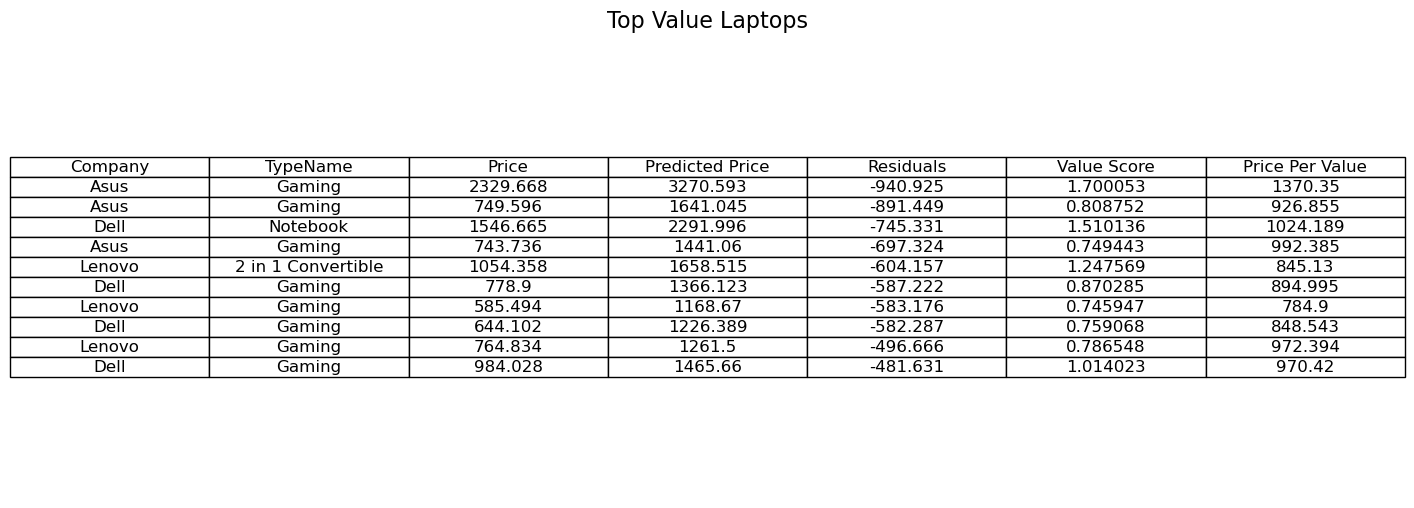

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the summary table to a pandas DataFrame
summary_data = {
    "Company": ["Asus", "Asus", "Dell", "Asus", "Lenovo", "Dell", "Lenovo", "Dell", "Lenovo", "Dell"],
    "TypeName": ["Gaming", "Gaming", "Notebook", "Gaming", "2 in 1 Convertible", "Gaming", "Gaming", "Gaming", "Gaming", "Gaming"],
    "Price": [2329.668, 749.596, 1546.665, 743.736, 1054.358, 778.900, 585.494, 644.102, 764.834, 984.028],
    "Predicted Price": [3270.593, 1641.045, 2291.996, 1441.060, 1658.515, 1366.123, 1168.670, 1226.389, 1261.500, 1465.660],
    "Residuals": [-940.925, -891.449, -745.331, -697.324, -604.157, -587.222, -583.176, -582.287, -496.666, -481.631],
    "Value Score": [1.700053, 0.808752, 1.510136, 0.749443, 1.247569, 0.870285, 0.745947, 0.759068, 0.786548, 1.014023],
    "Price Per Value": [1370.350, 926.855, 1024.189, 992.385, 845.130, 894.995, 784.900, 848.543, 972.394, 970.420]
}

summary_df = pd.DataFrame(summary_data)

# Plot the table and save it as a PNG file
fig, ax = plt.subplots(figsize=(15, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title("Top Value Laptops", fontsize=16)
plt.show()
